In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from PIL import Image
import plotly.express as px

# natural language processing 
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


<img src="https://miro.medium.com/max/1400/1*zORAxCKoI6RglByVqt6jmg.png">

In [81]:
# test
test_path = "../input/nlp-getting-started/test.csv"
test = pd.read_csv(test_path)

# train
train_path = "../input/nlp-getting-started/train.csv"
train = pd.read_csv(train_path)

#### Splitting Disaster And Not Disaster Tweets

In [82]:
disaster = train[train['target'] == 1]
not_disaster = train[train['target'] == 0]

In [83]:
disaster.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [84]:
not_disaster.head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


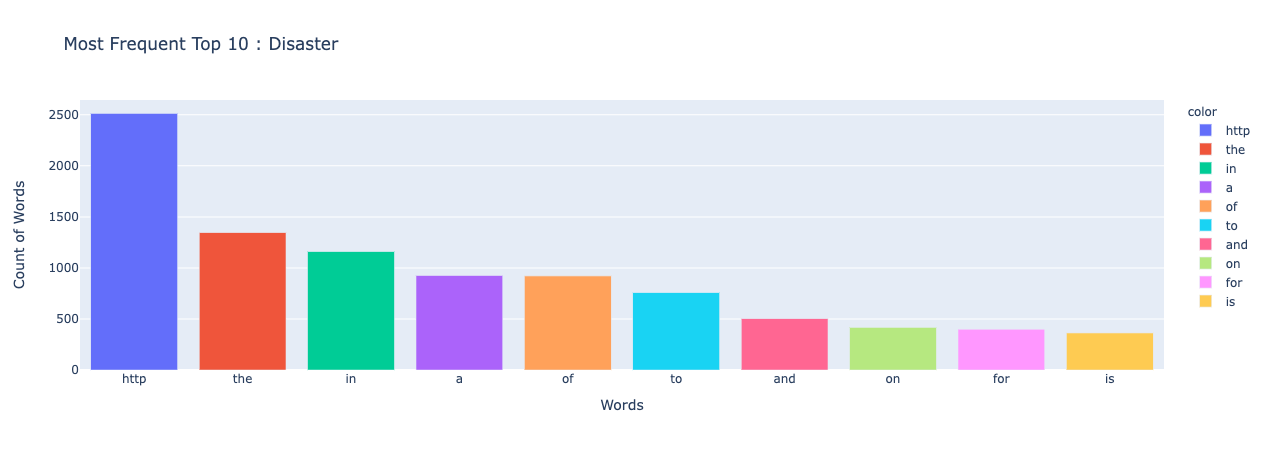

In [85]:
# setting stopwords / stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

nested_list_disaster = []

for i in disaster.text:
    words = word_tokenize(i)
    # filtering tweets
    filtered_tweets = [stemmer.stem(word) for word in words if word is not stop_words and word.isalpha()]
    nested_list_disaster.append(filtered_tweets)

# flattening list
flatten = [item for sublist in nested_list_disaster for item in sublist]

# creating series
unique_words_disaster = pd.Series(flatten).value_counts()

frequent_words_disaster = unique_words_disaster[:]
top_10_most_frequent_disaster = frequent_words_disaster[:10]

fig = px.bar(x=top_10_most_frequent_disaster.index, y=top_10_most_frequent_disaster.values, color=top_10_most_frequent_disaster.index, 
             title="Most Frequent Top 10 : Disaster", labels=dict(x="Words", y="Count of Words"))
fig.show() 

#### Disaster WordCloud

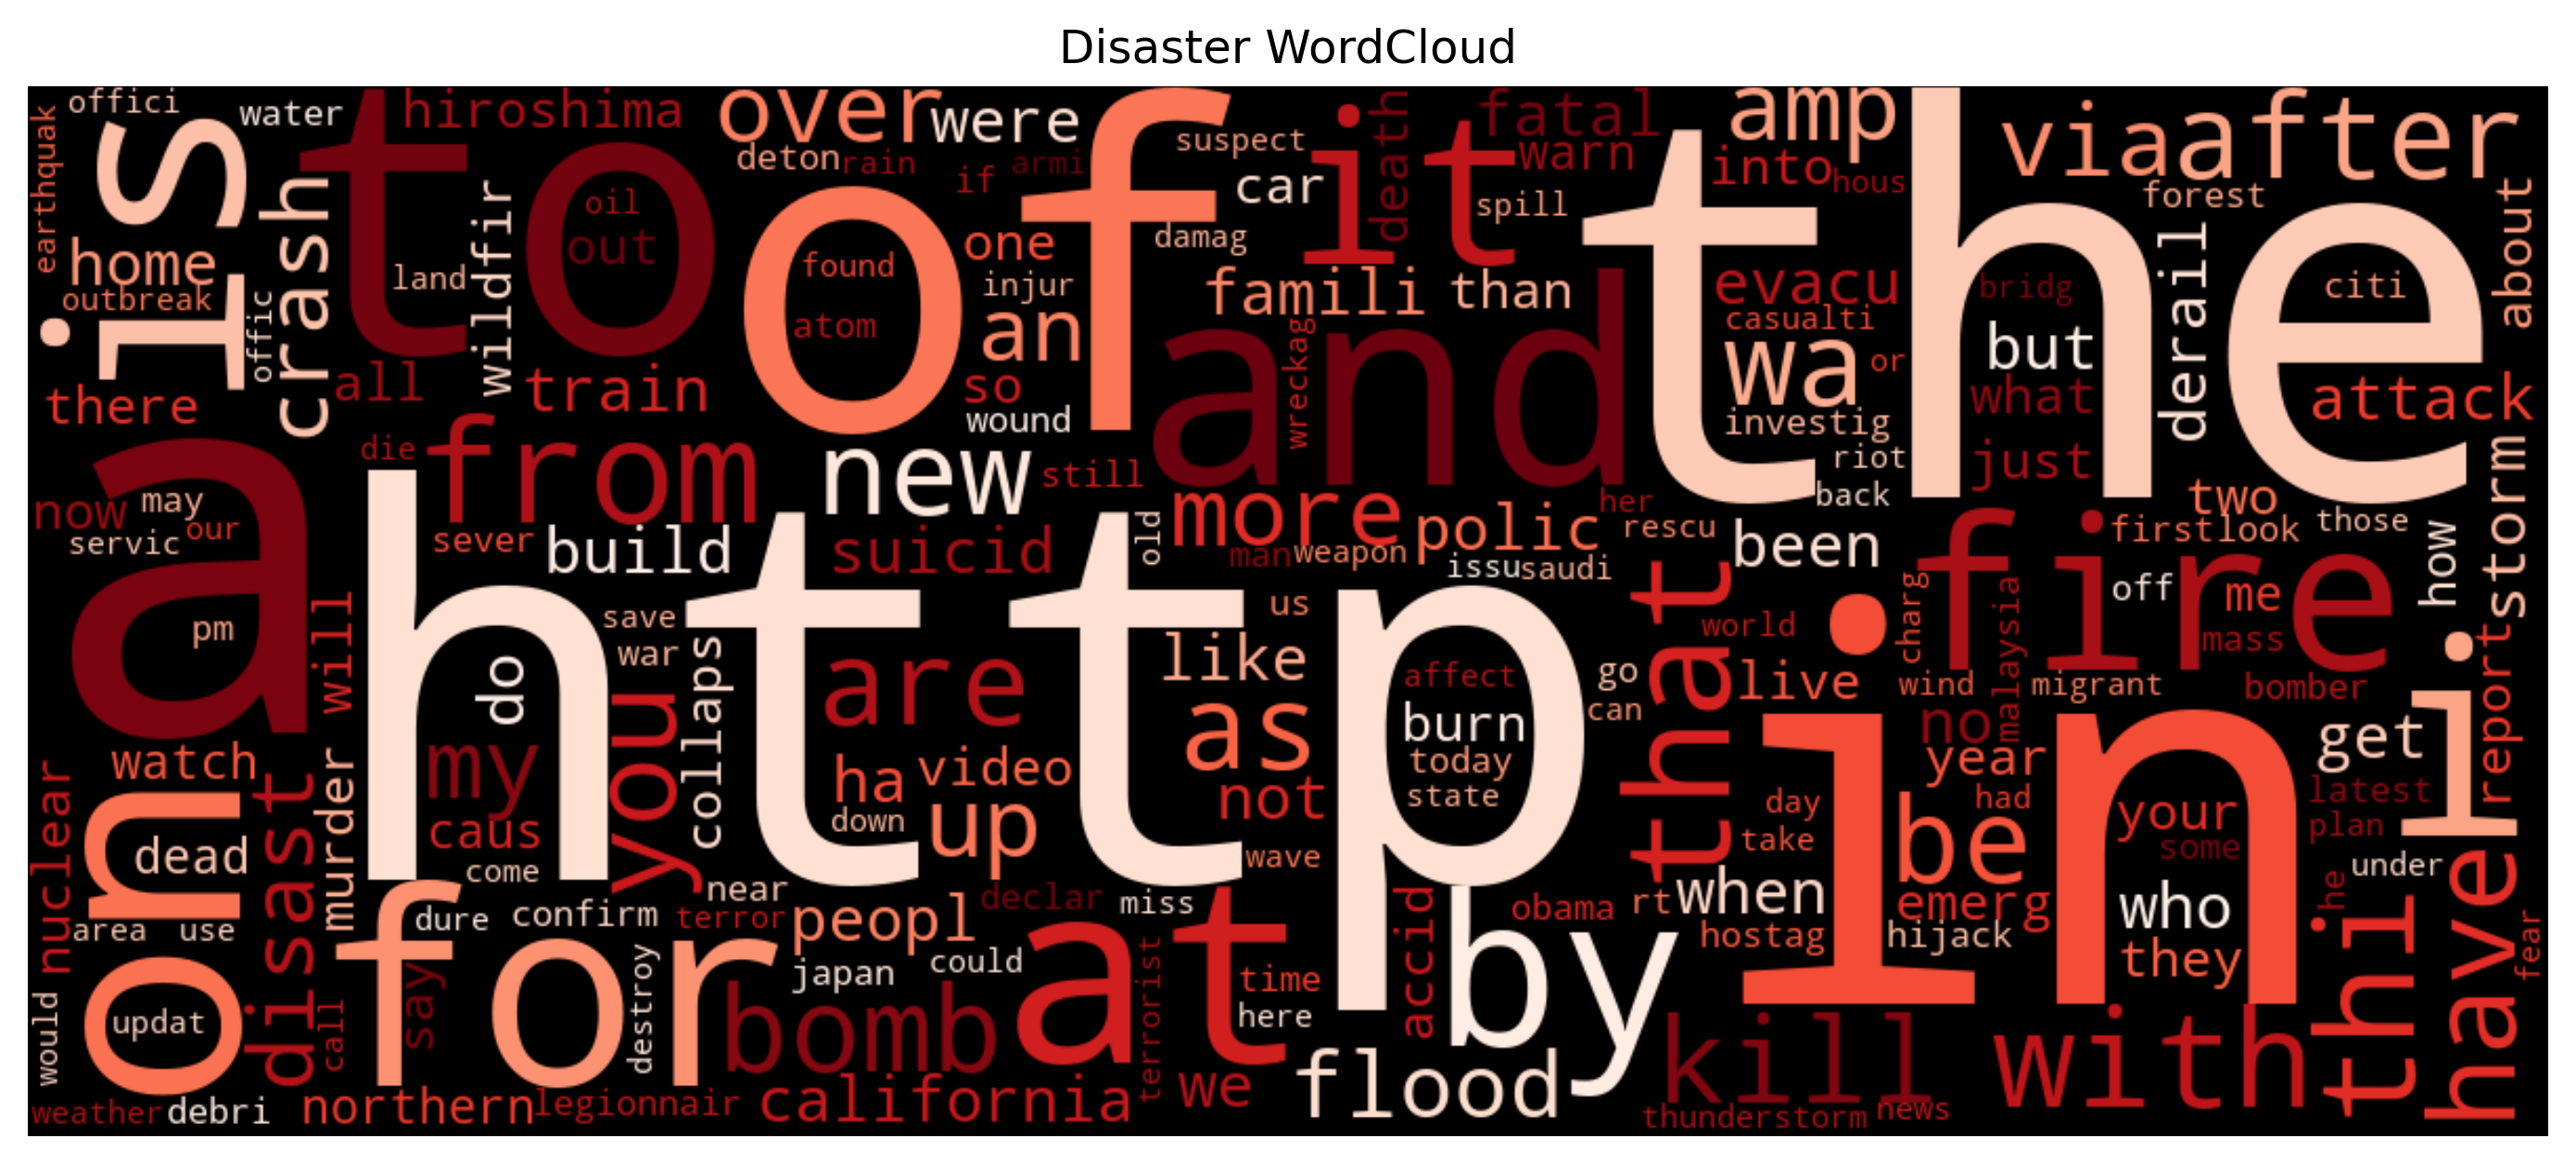

In [86]:
disaster_word_cloud = pd.DataFrame(flatten)
disaster_word_cloud.columns = ['Words']

title_words = pd.DataFrame(list(zip(disaster_word_cloud['Words'].value_counts().index,disaster_word_cloud['Words'].value_counts())), columns=['Words','Count'], index=None)
title_words = dict(zip(title_words['Words'].tolist(), title_words['Count'].tolist()))

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, 
                         relative_scaling=0,
                         background_color="black", 
                         colormap="Reds").generate_from_frequencies(title_words)

plt.figure(figsize=(15,5), dpi=300)
plt.title('Disaster WordCloud')
plt.imshow(wc, interpolation='bilinear', alpha=1)
_ = plt.axis("off")

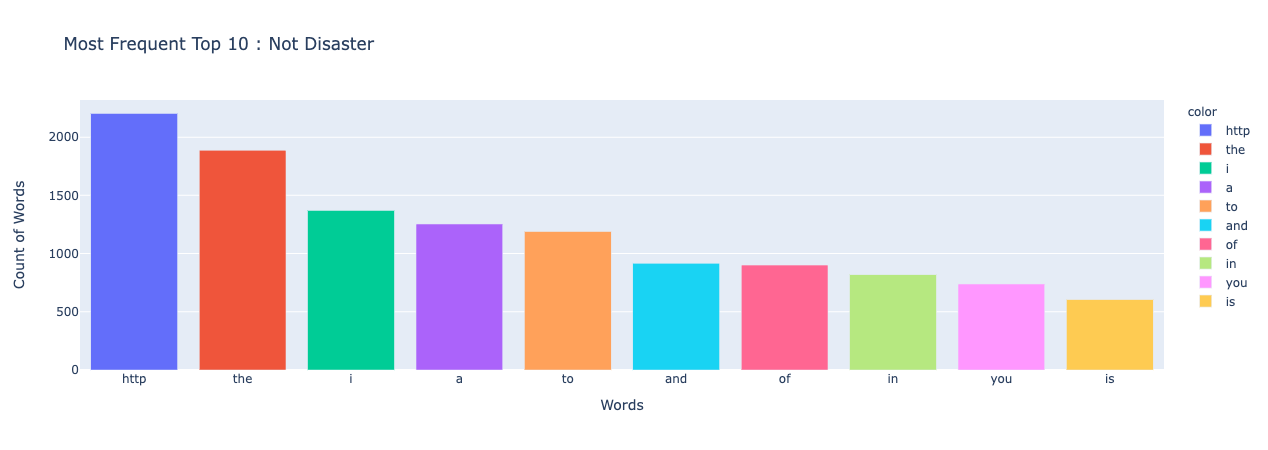

In [87]:
nested_list_not_disaster = []

for i in not_disaster.text:
    words = word_tokenize(i)
    # filtering tweets
    filtered_tweets = [stemmer.stem(word) for word in words if word is not stop_words and word.isalpha()]
    nested_list_not_disaster.append(filtered_tweets)

# flattening list
flatten = [item for sublist in nested_list_not_disaster for item in sublist]

# creating series
unique_words_not_disaster = pd.Series(flatten).value_counts()

frequent_words_not_disaster = unique_words_not_disaster[:]
top_10_most_frequent_not_disaster = frequent_words_not_disaster[:10]

fig = px.bar(x=top_10_most_frequent_not_disaster.index, y=top_10_most_frequent_not_disaster.values, color=top_10_most_frequent_not_disaster.index, 
             title="Most Frequent Top 10 : Not Disaster", labels=dict(x="Words", y="Count of Words"))
fig.show() 

#### Not Disaster WordCloud

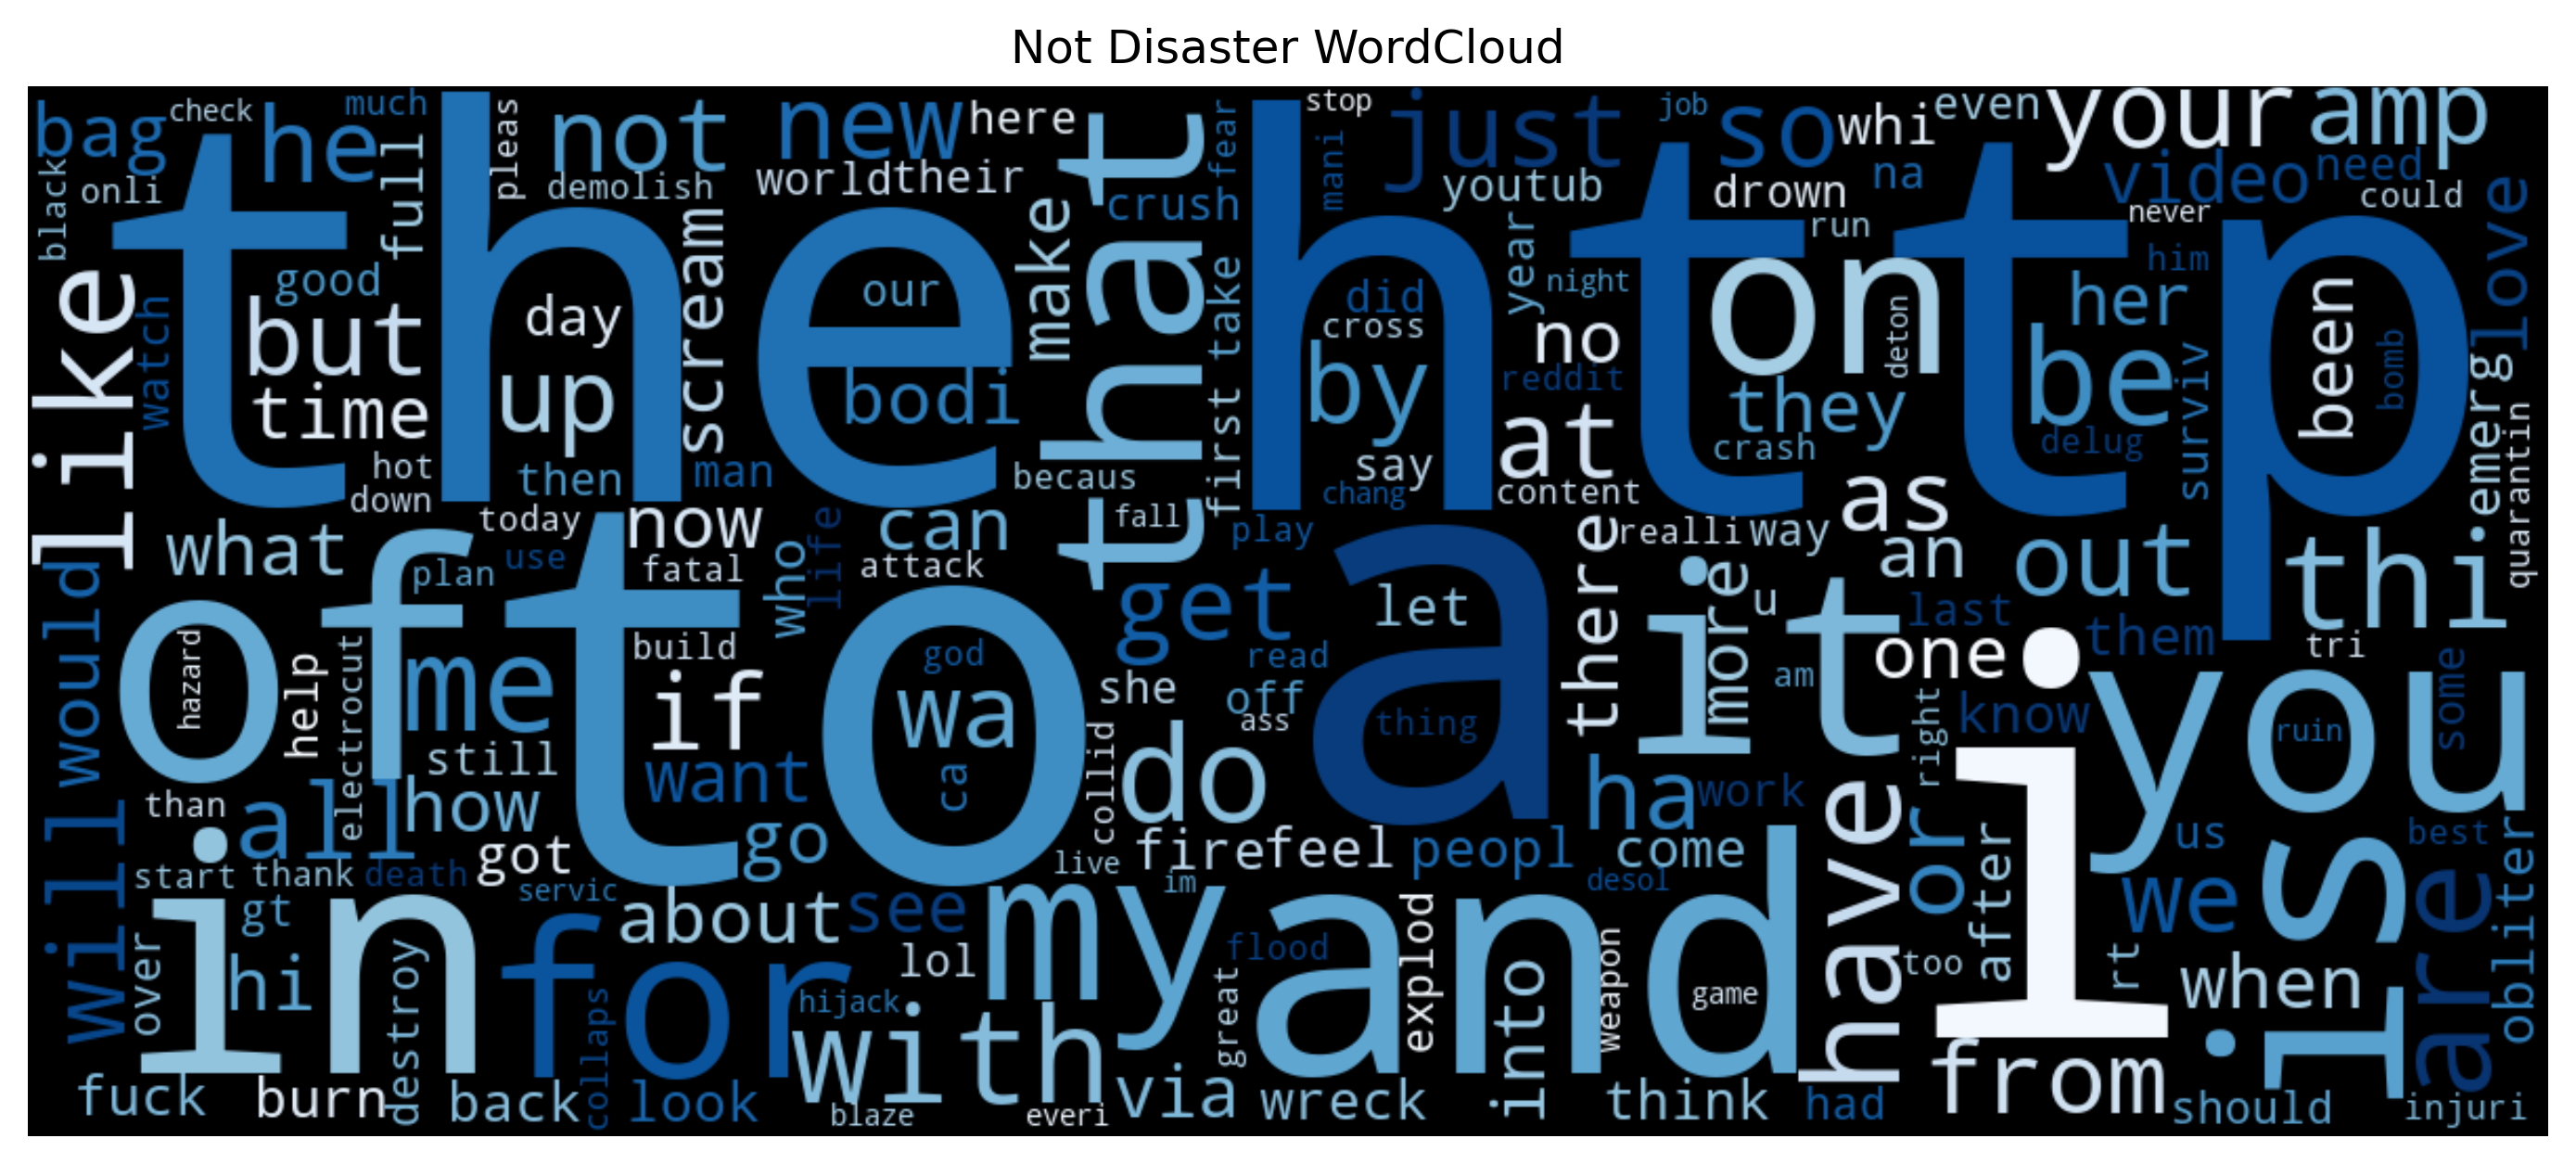

In [88]:
not_disaster_word_cloud = pd.DataFrame(flatten)
not_disaster_word_cloud.columns = ['Words']

title_words = pd.DataFrame(list(zip(not_disaster_word_cloud['Words'].value_counts().index,not_disaster_word_cloud['Words'].value_counts())), columns=['Words','Count'], index=None)
title_words = dict(zip(title_words['Words'].tolist(), title_words['Count'].tolist()))

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, 
                         relative_scaling=0,
                         background_color="black", 
                         colormap="Blues").generate_from_frequencies(title_words)

plt.figure(figsize=(15,5), dpi=300)
plt.title('Not Disaster WordCloud')
plt.imshow(wc, interpolation='bilinear', alpha=1)
_ = plt.axis("off")

In [89]:
word_size = 12142

nested_list = []

for i in train.text:
    words = word_tokenize(i)
    # filtering tweets
    filtered_tweets = [stemmer.stem(word) for word in words if word is not stop_words and word.isalpha()]
    nested_list.append(filtered_tweets)

In [90]:
word_columns_df = pd.DataFrame.from_records(nested_list)
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,our,deed,are,the,reason,of,thi,earthquak,may,allah,...,None,None,None,None,None,None,None,None,None,None
1,forest,fire,near,la,rong,sask,canada,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,all,resid,ask,to,in,place,are,be,notifi,by,...,None,None,None,None,None,None,None,None,None,None
3,peopl,receiv,wildfir,evacu,order,in,california,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,just,got,sent,thi,photo,from,rubi,alaska,as,smoke,...,None,None,None,None,None,None,None,None,None,None


#### Splitting Dataset for Testing

In [91]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, train.target,
                                                   test_size=0.2, random_state=1)

In [92]:
# flattening list
flatten = [item for sublist in nested_list for item in sublist]

# creating series
unique_words = pd.Series(flatten).value_counts()
frequent_words = unique_words[0:word_size]

# creating vocab
tweet_ids = list(range(0, word_size))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=tweet_ids)
vocab.index.name = 'WORD_ID'
word_index = pd.Index(vocab.VOCAB_WORD)

def create_sparse_matrix(df, indexed_words, labels):
    
    rows = df.shape[0]
    cols = df.shape[1]
    word_set = set(indexed_words)
    my_dict = []
    
    for i in range(rows):
        for j in range(cols):
            
            word = df.iat[i, j]
            if word in word_set:
                ID = df.index[i]
                tweet_id = indexed_words.get_loc(word)
                category = labels.at[ID]
                
                item = {'LABEL': category, 'TWEET_ID': ID,
                       'FREQ': 1, 'WORD_ID': tweet_id}
                
                my_dict.append(item)
    
    return pd.DataFrame(my_dict)

In [93]:
sparse_train = create_sparse_matrix(X_train, word_index, y_train)
train_grouped = sparse_train.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,FREQ
0,0,1,1,1
1,0,5,1,1
2,0,19,1,1
3,0,22,1,1
4,0,43,1,1


In [94]:
sparse_test = create_sparse_matrix(X_test, word_index, y_test)

test_grouped = sparse_test.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,TWEET_ID,WORD_ID,LABEL,FREQ
0,7,1,1,2
1,7,2,1,1
2,7,3,1,1
3,7,5,1,1
4,7,6,1,2


In [95]:
train_grouped.LABEL.value_counts()

0    44801
1    34791
Name: LABEL, dtype: int64

In [96]:
def make_full_matrix(matrix):
    
    # convert to np array
    matrix = np.array(matrix)
    
    # create dataframe
    col = ['TWEET_ID'] + ['TARGET'] + list(range(0, word_size))
    index_names = np.unique(matrix[:,0])
    complete_matrix = pd.DataFrame(index=index_names, columns=col)
    complete_matrix.fillna(0, inplace=True)
    
    # fill dataframe
    for i in range(matrix.shape[0]):
        doc_num = matrix[i][0]
        tweet_id = matrix[i][1]
        label = matrix[i][2]
        frequency = matrix[i][3]
        
        complete_matrix.at[doc_num, 'TWEET_ID'] = doc_num
        complete_matrix.at[doc_num, 'TARGET'] = label
        complete_matrix.at[doc_num, tweet_id] = frequency
    
    complete_matrix.set_index('TWEET_ID', inplace=True)
    return complete_matrix

#### Train Data

In [97]:
train_data = make_full_matrix(train_grouped)

train_data.head()

,TARGET,0,1,2,3,4,5,6,7,8,...,12132,12133,12134,12135,12136,12137,12138,12139,12140,12141
TWEET_ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
test_data = make_full_matrix(test_grouped)

test_data.head()

,TARGET,0,1,2,3,4,5,6,7,8,...,12132,12133,12134,12135,12136,12137,12138,12139,12140,12141
TWEET_ID,,,,,,,,,,,,,,,,,,,,,
7,1,0,2,1,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Probability of a tweet indicating a disaster

In [99]:
prob_disaster = train_data.TARGET.sum() / (train_data.TARGET.size)
print(f'Probability of a tweet indicating a disaster : {prob_disaster}')
print(f'Probability of a tweet indicating not disaster : {1 - prob_disaster}')

Probability of a tweet indicating a disaster : 0.4319264247002792
Probability of a tweet indicating not disaster : 0.5680735752997208


#### Total tweets

In [100]:
# grabbing all features except for TARGET
all_train_features = train_data.loc[:, train_data.columns != 'TARGET']

# summing per row
total_tweets_sum = all_train_features.sum(axis=1)
total_tweets = total_tweets_sum.sum()
print(f"Total tweets : {total_tweets}") 

Total tweets : 84927


#### Disaster only

In [101]:
# grabbing all features except for TARGET
disaster_only_sum = total_tweets_sum[train_data['TARGET'] == 1]
total_disaster_tweets = disaster_only_sum.sum()
print(f"Total disaster tweets : {total_disaster_tweets}")

Total disaster tweets : 37002


#### Not disaster only

In [102]:
# grabbing all features except for TARGET
not_disaster_only_sum = total_tweets_sum[train_data['TARGET'] == 0]
total_not_disaster_tweets = not_disaster_only_sum.sum()
print(f"Total not disaster tweets : {total_not_disaster_tweets}")

Total not disaster tweets : 47925


#### Visualising With Pie Chart

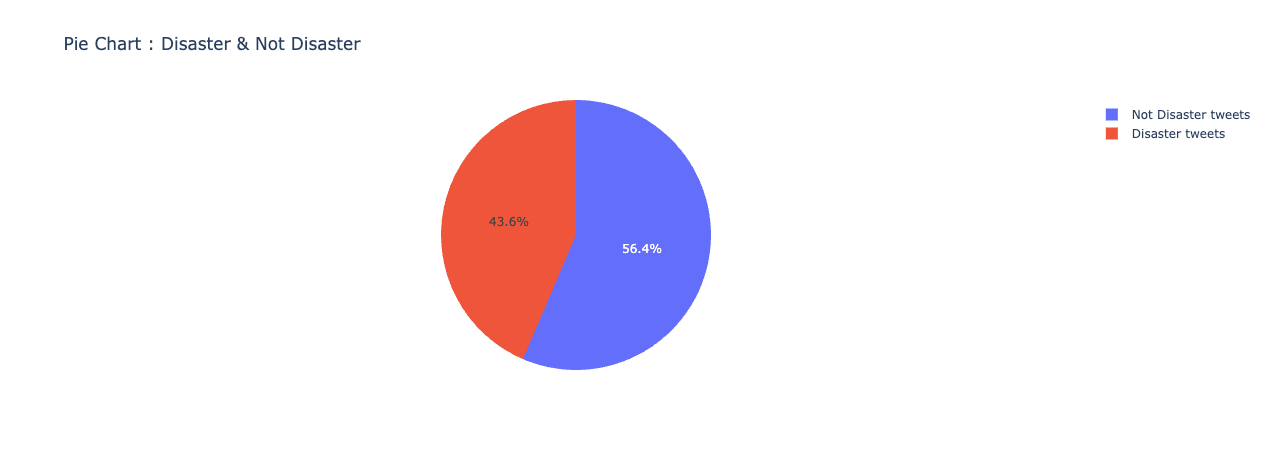

In [103]:
tweets = [total_disaster_tweets, total_not_disaster_tweets]

fig = px.pie(values=tweets, names=['Disaster tweets','Not Disaster tweets'], title='Pie Chart : Disaster & Not Disaster')
fig.show()

#### Summing the Tokens Frequency in Disaster Tweets

In [104]:
disaster_only_sum = all_train_features.loc[train_data.TARGET == 1]
disaster_tok_sum = disaster_only_sum.sum(axis=0)+1
print(f"Total Disaster Tokens : {disaster_tok_sum.sum()}")

Total Disaster Tokens : 49144


#### Summing the Tokens Frequency in Disaster Tweets

In [105]:
not_disaster_only_sum = all_train_features.loc[train_data.TARGET == 0]
non_disaster_tok_sum = not_disaster_only_sum.sum(axis=0)+1
print(f"Total Non Disaster Tokens : {non_disaster_tok_sum.sum()}")

Total Non Disaster Tokens : 60067


In [106]:
# P(Token | Disaster) - Probability that a Token in the Tweet indicates Disaster
prob_tok_disaster = disaster_tok_sum / (total_disaster_tweets + word_size)

# P(Token | Not Disaster) - Probability that a Token in the Tweet indicates Not Disaster
prob_tok_not_disaster = non_disaster_tok_sum / (total_not_disaster_tweets + word_size)

# P(Token) - Probability that a Token in a Tweet
prob_tok_all = all_train_features.sum(axis=0) / total_tweets

#### Making Predictions and Checking Our Accuracies 

In [107]:
X_test = test_data.loc[:, test_data.columns != 'TARGET']
y_test = test_data['TARGET']

$$P(Disaster \, | \, X) \, > \, P(Not \ Disaster \, | \, X)$ AND $P(Disaster \, | \, X) \, < \, P(Not \ Disaster \, | \, X)$$

In [108]:
disaster = X_test.dot(np.log(prob_tok_disaster)) + np.log(prob_disaster)
non_disaster = X_test.dot(np.log(prob_tok_not_disaster)) + np.log(1-prob_disaster)

In [109]:
predict = disaster > non_disaster

#### Visualising Accuarcy

In [110]:
print(f'Tweets correctly predicted {(y_test == predict).sum()}')
print(f'Tweets incorrectly predicted {X_test.shape[0] - (y_test == predict).sum()}')

print(f'\nOur accuracy : {(y_test == predict).sum()/len(X_test)*100:.3}%')

Tweets correctly predicted 1221
Tweets incorrectly predicted 302

Our accuracy : 80.2%


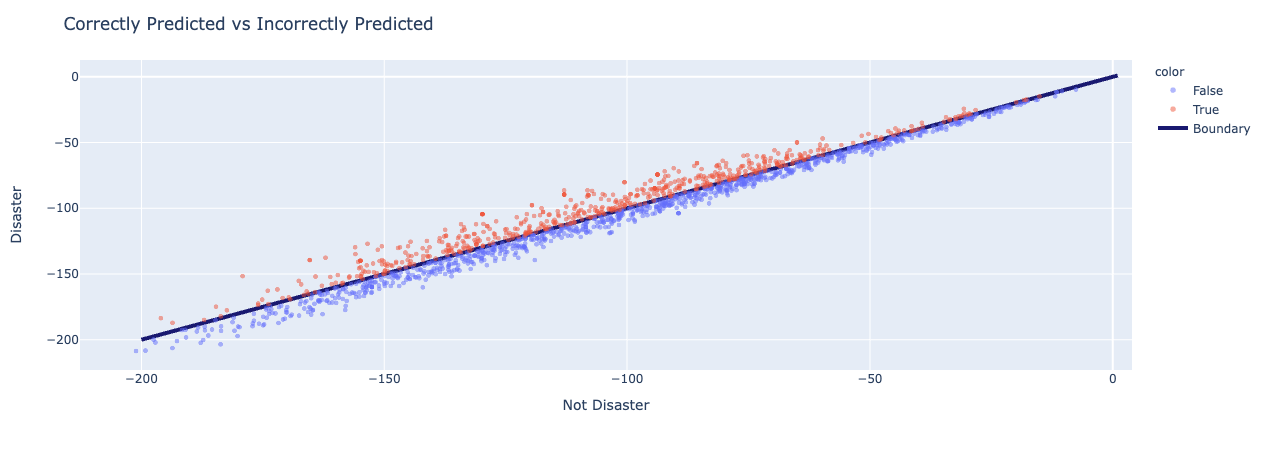

In [111]:
chart = pd.DataFrame(disaster)
chart.columns = ['Disaster']
chart['Not Disaster'] = non_disaster
chart['Target'] = predict

import plotly.graph_objects as go

linedata = np.linspace(start=-200, stop=1, num=200)

fig = go.Figure()

fig = px.scatter(chart, y="Disaster", x="Not Disaster", color=predict, opacity=0.5)

fig.add_trace(go.Scatter(x=linedata, y=linedata,mode='lines',name='Boundary'))

fig.update_traces(marker_size=5.5, line_width=4,  line_color="midnightblue")

fig.update_layout(title="Correctly Predicted vs Incorrectly Predicted")
fig.show()